# Mesh

See [Mesh in MIKE IO Documentation](https://dhi.github.io/mikeio/mesh.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mikeio

## A simple mesh

Let's consider a simple mesh consisting of 2 triangular elements. 

In [2]:
fn = "data/two_elements.mesh"

In [3]:
with open(fn, "r") as f:
    print(f.read())

100079 1000 4  UTM-31
1 0.0 0.0 -10.0 1 
2 3.0 0.0 -10.0 2 
3 3.0 3.0 -10.0 2 
4 0.0 3.0 -10.0 1 
2 3 21
1 1 2 4
2 2 3 4 



In [4]:
msh = mikeio.open(fn)
msh

Flexible Mesh
number of elements: 2
number of nodes: 4
projection: UTM-31

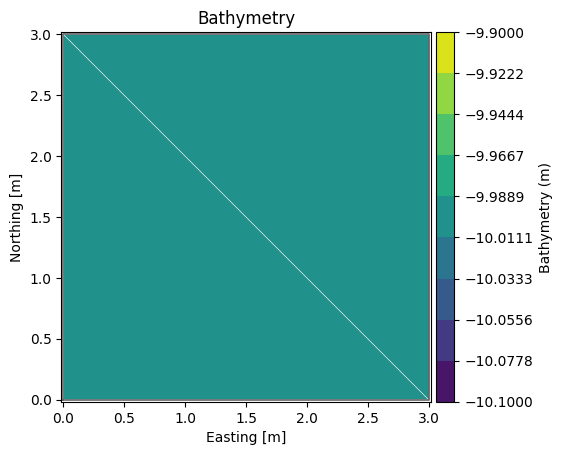

In [5]:
msh.plot(show_mesh=True);

In [6]:
msh.node_coordinates

array([[  0.,   0., -10.],
       [  3.,   0., -10.],
       [  3.,   3., -10.],
       [  0.,   3., -10.]])

In [7]:
msh.element_table

[array([0, 1, 3], dtype=int32), array([1, 2, 3], dtype=int32)]

In [8]:
msh.element_coordinates

array([[  1.,   1., -10.],
       [  2.,   2., -10.]])

In [9]:
msh.get_element_area()

array([4.5, 4.5])

Let's plot the node and element coordinates:

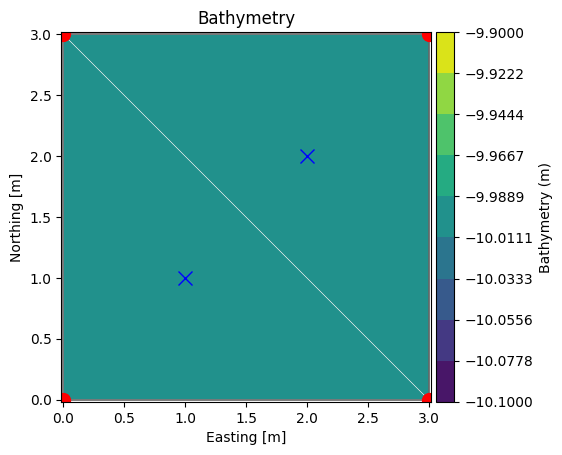

In [10]:
xn, yn = msh.node_coordinates[:,0], msh.node_coordinates[:,1]
xe, ye = msh.element_coordinates[:,0], msh.element_coordinates[:,1]

ax = msh.plot(show_mesh=True)
ax.plot(xn, yn, 'ro', markersize=10)
ax.plot(xe, ye, 'bx', markersize=10)

### Boundary polylines

It can sometimes be convenient to have mesh boundary as a polyline (or multiple in case of more complex meshes). 

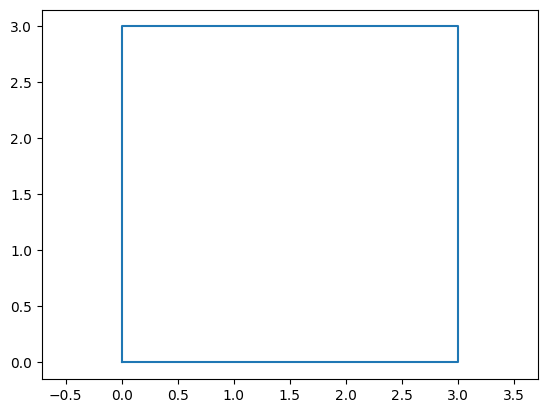

In [11]:
bxy = msh.boundary_polylines.exteriors[0].xy
plt.plot(bxy[:,0], bxy[:,1])
plt.axis("equal");

## Inside domain?

MIKE IO has a method for determining if a point (or a list of points) is inside the domain: 

* contains()

In [12]:
pt_1 = [2.0, 1.2]
msh.contains(pt_1)[0]

True

In [13]:
# or multiple points at the same time
pt_2 = [4.0, 1.2]
pts = np.array([pt_1, pt_2])
msh.contains(pts)

array([ True, False])

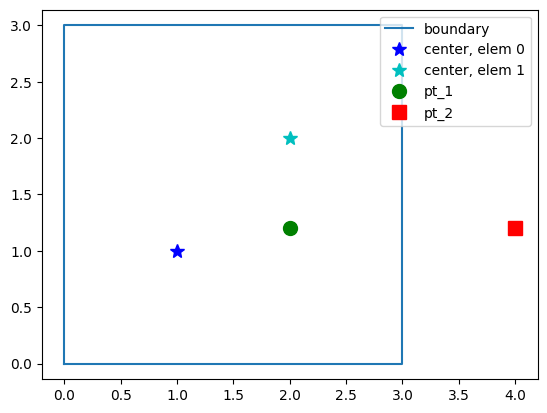

In [14]:
plt.plot(bxy[:,0], bxy[:,1], label='boundary')
plt.plot(xe[0], ye[0], 'b*', markersize=10, label="center, elem 0")
plt.plot(xe[1], ye[1], 'c*', markersize=10, label="center, elem 1")
plt.plot(*pt_1, 'go', markersize=10, label="pt_1")
plt.plot(*pt_2, 'rs', markersize=10, label="pt_2")
plt.axis("equal")
plt.legend(loc="upper right");

## Find element containing point

MIKE IO has a method for obtaining the index of the element *containing* a point: 

* find_index()

In [15]:
g = msh.geometry
g.find_index(coords=pt_1)[0]

1

MIKE IO also has a method for obtaining a list of the n *closest* element centers: 

* find_nearest_elements()

In [16]:
g.find_nearest_elements(pt_1)

1

In [17]:
g.find_nearest_elements(pt_1, return_distances=True)

(1, 0.8)

In [18]:
g.find_nearest_elements(pt_1, n_nearest=2)

array([1, 0])

In [19]:
# for multiple points
g.find_nearest_elements(pts, return_distances=True)

(array([1, 1]), array([0.8       , 2.15406592]))

## A larger mesh

In [20]:
dfs = mikeio.open("data/FakeLake.dfsu")
g = dfs.geometry
g

Flexible Mesh Geometry: Dfsu2D
number of nodes: 798
number of elements: 1011
projection: PROJCS["UTM-17",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",-81],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]

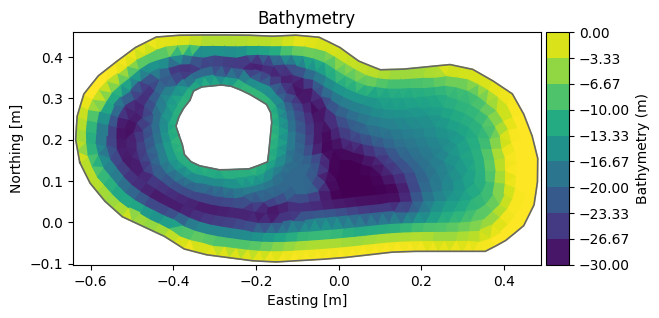

In [21]:
g.plot();

### Inline Exercise

1) please check if the point A: (x,y)=(-0.5, 0.0) is inside the mesh
2) please check if the point B: (x,y)=(-0.5, 0.4) is inside the mesh
3) find index of the 5 closest points to B

In [22]:
# insert code here

In [27]:
g.max_nodes_per_element

4

## Change depth

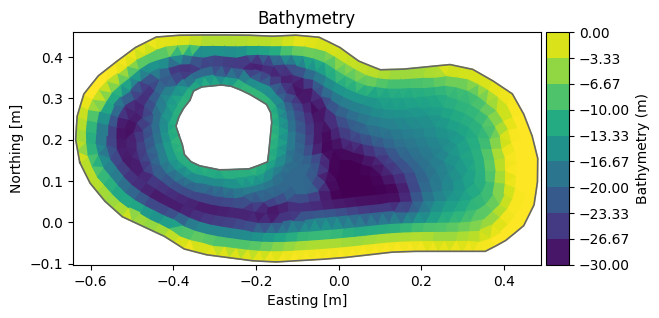

In [33]:
msh = mikeio.open("data/FakeLake.dfsu").geometry
msh.plot();

In [37]:
msh.node_coordinates[:,2] = np.clip(msh.node_coordinates[:,2], -15, 0) # clip depth to interval [-15,0]

In [42]:
msh.to_mesh('Fake_lake_clip15.mesh')   # save to a new file

<Axes: title={'center': 'Bathymetry'}, xlabel='Easting [m]', ylabel='Northing [m]'>

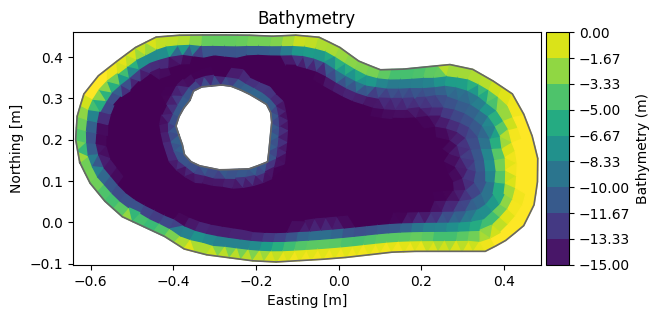

In [43]:
msh2 = mikeio.open('Fake_lake_clip15.mesh')
msh2.plot()

## Visualisation

In [ ]:
msh = mikeio.open("data/southern_north_sea.mesh")
msh

The default is to plot the elements and color them according to the bathymetry.

In [ ]:
msh.plot();

In [ ]:
msh.plot.outline();

In [ ]:
msh.plot.mesh();

Maybe we would like to higlight the bathymetric variations in some range, in this case in the -40, -20m range.

In [ ]:
msh.plot(vmin=-40, vmax=-20);

There are other options as well, such as explicit specification of which contour lines to show or choosing a specific colormap ([matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html))

In [ ]:
msh.plot.contour(show_mesh=True, 
         levels=[-50,-30,-20,-10,-5], cmap="tab10",
         figsize=(12,12), title="Coarse North Sea model");

See the [MIKE IO Mesh Example notebook](https://nbviewer.jupyter.org/github/DHI/mikeio/blob/main/notebooks/Mesh.ipynb) for more Mesh operations (including shapely operations).